In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(print_changed_only=False)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

### 📖Load the data

In [2]:
df = pd.read_csv("./Data/Population.csv")
df.tail()

,Year,Density,World_Population
69,1955.0,18.0,2.740214e+09
70,1954.0,18.0,2.685895e+09
71,1953.0,18.0,2.634106e+09
72,1952.0,17.0,2.584086e+09
73,NaN,NaN,NaN


### 📖Check for NaN values

In [3]:
df.isnull().sum()

Year                1
Density             1
World_Population    1
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

Year                0
Density             0
World_Population    0
dtype: int64

### 📖Data preprocessing

In [5]:
df["World_Population"] = df["World_Population"] / 1000000000
df

,Year,Density,World_Population
0,2024.0,55.0,8.161973
1,2023.0,54.0,8.091735
2,2022.0,54.0,8.021407
3,2021.0,53.0,7.954448
4,2020.0,53.0,7.887001
...,...,...,...
68,1956.0,19.0,2.795410
69,1955.0,18.0,2.740214
70,1954.0,18.0,2.685895
71,1953.0,18.0,2.634106


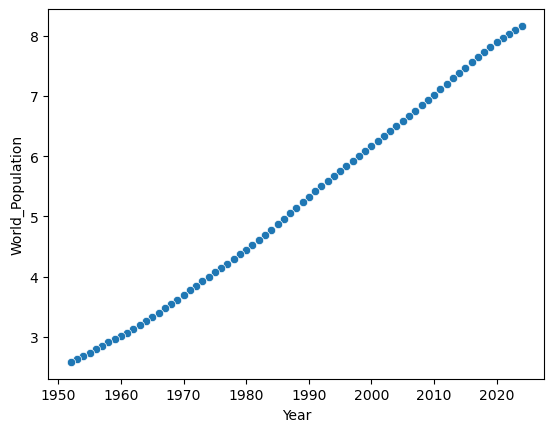

In [6]:
sns.scatterplot(data=df, y='World_Population', x='Year')
plt.show()

In [7]:
x = df.drop(['World_Population'], axis=1).values
y = df['World_Population'].values
x.shape

(73, 2)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

### 📖Set up and train RandomForestRegressor

In [9]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

### 📖Check performance

In [10]:
y_pred = model.predict(x_test)
print(x_test)
y_pred

[[2020.   53.]
 [1961.   21.]
 [2006.   45.]
 [2024.   55.]
 [1996.   39.]
 [1952.   17.]
 [2014.   50.]
 [1990.   36.]
 [2012.   48.]
 [1969.   24.]
 [1959.   20.]
 [1993.   38.]
 [2015.   50.]
 [1979.   29.]
 [2019.   52.]]


array([7.90212651, 3.07836676, 6.65794888, 8.05334935, 5.77533912,
       2.66429221, 7.35028968, 5.30066223, 7.11317007, 3.55021338,
       2.93461381, 5.5971802 , 7.4223503 , 4.30688937, 7.72044404])

In [11]:
mean_absolute_error(y_test, y_pred)

0.05007083594666488

In [12]:
#1990, 36
input = np.array([2100, 100]).reshape(-1,2)
model.predict(input)

array([8.05334935])